Step-by-step example of how to check the linear regression assumptions in Python, using statsmodels, matplotlib, and seaborn.

Assumptions for Linear Regression:

1. Linearity

2. Independence of errors

3. Homoscedasticity

4. Normality of residuals

5. Multicollinearity

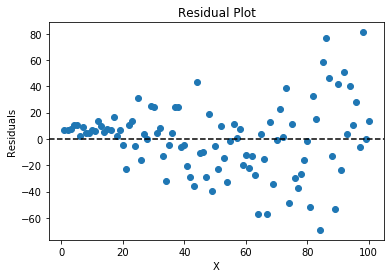

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.diagnostic import het_breuschpagan

# Generate sample data
np.random.seed(0)
x = np.linspace(1, 100, 100)
y = 3 * x + 10 + np.random.normal(0, x * 0.5)  # heteroscedastic noise

# Create DataFrame
df = pd.DataFrame({'x': x, 'y': y})

# Fit linear regression model
model = smf.ols('y ~ x', data=df).fit()

# Residual plot
plt.scatter(df['x'], model.resid)
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('X')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [3]:
# Breusch-Pagan test
test_result = het_breuschpagan(model.resid, model.model.exog)
labels = ['Lagrange multiplier statistic', 'p-value', 
          'f-value', 'f p-value']
print(dict(zip(labels, test_result)))


{'Lagrange multiplier statistic': 20.26540025499233, 'p-value': 6.740865834777569e-06, 'f-value': 24.907746841904682, 'f p-value': 2.611232805568535e-06}


Interpretation:
Look at the p-value from the test:

p < 0.05 → Evidence of heteroscedasticity.

p ≥ 0.05 → No significant evidence of heteroscedasticity.

# Using Sample Data

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro
from statsmodels.graphics.gofplots import qqplot

# Load example dataset
from sklearn.datasets import load_boston
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['PRICE'] = boston.target

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
# Features and target
X = df[['RM', 'LSTAT', 'PTRATIO']]  # example predictors
y = df['PRICE']

# Add constant for intercept
X = sm.add_constant(X)

# Fit model
model = sm.OLS(y, X).fit()

# Get residuals and predicted values
residuals = model.resid
fitted = model.fittedvalues


# 1. Linearity

Check: Plot residuals vs. predicted values

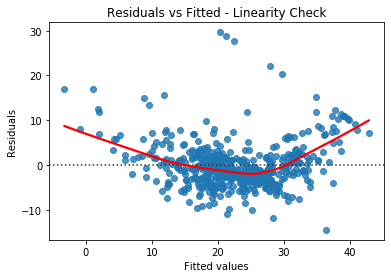

In [9]:
sns.residplot(x=fitted, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted - Linearity Check")
plt.show()

If the red line is flat and residuals are randomly scattered → linearity holds.

The non-flat red line suggests some non-linearity in the relationship. There's a funnel shape where residuals spread out more at higher fitted values.
So, the linearity assumption is partially violated.

# 2. Independence of Errors

Check: Durbin-Watson statistic

In [10]:
from statsmodels.stats.stattools import durbin_watson

dw = durbin_watson(residuals)
print(f"Durbin-Watson: {dw:.2f}")


Durbin-Watson: 0.90


Value around 2 suggests errors are independent (no autocorrelation).

0.90 is low, suggesting positive autocorrelation.
❌ This assumption is likely violated.

# 3. Homoscedasticity (Equal Variance)

Check: Same plot as linearity, or Breusch-Pagan test

In [11]:
from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(residuals, X)
print(f"Breusch-Pagan p-value: {bp_test[1]:.4f}")

Breusch-Pagan p-value: 0.6543


p > 0.05 → No evidence of heteroscedasticity (i.e., good).

Since p > 0.05, we fail to reject the null hypothesis of constant variance.
✅ This assumption is satisfied.

Even though the Breusch-Pagan test passed, the plot above, suggests mild heteroscedasticity, especially at higher values.
But it's not severe.

# 4. Normality of Residuals


Check: Q-Q plot and Shapiro-Wilk test

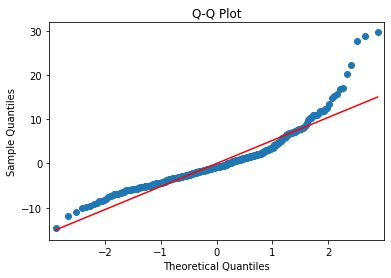

Shapiro-Wilk p-value: 0.0000


In [12]:
qqplot(residuals, line='s')
plt.title("Q-Q Plot")
plt.show()

stat, p = shapiro(residuals)
print(f"Shapiro-Wilk p-value: {p:.4f}")


If residuals lie along the line (Q-Q plot), and p > 0.05, residuals are likely normal.

Since p < 0.05, residuals are not normally distributed.
❌ This assumption is violated.

# 5. Multicollinearity
Check: Variance Inflation Factor (VIF)

In [14]:
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)


   feature         VIF
0    const  283.342604
1       RM    1.653419
2    LSTAT    1.679425
3  PTRATIO    1.198101


VIF > 5 or 10 may indicate problematic multicollinearity.

All VIF values < 5 → No significant multicollinearity
✅ This assumption is satisfied.
(Ignore constant)